
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Natalia! Tu trabajo es excelente 

Has completado todos los items necesarios para aprobar la entrega.

</div>

# Proyecto 11_Pozos de petróleo

# 1. Preparación de los datos

In [6]:
#importación librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Cargar los datos
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

data_0.info()
data_1.info()
data_2.info()

print(data_0.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda modularizar mejor las celdas. También es una buena práctica separar el import de librerías del resto del código.

</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien hecho! Eliminaste la columna id al entrenar, que generalmente no aporta valor al modelo. Mantener solo las características relevantes es clave para mejorar el rendimiento del modelo y evitar la sobrecarga de datos innecesarios.

</div>

In [2]:
# Función para preparar los datos y entrenar el modelo
def train_model(data):
    # Dividir en características (X) y objetivo (y)
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    
    # Dividir en entrenamiento y validación (75:25)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de validación
    y_pred = model.predict(X_val)
    
    # Calcular RMSE y volumen medio predicho
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mean_predicted_volume = y_pred.mean()
    
    return y_val, y_pred, rmse, mean_predicted_volume

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has dividido los datos correctamente en conjuntos de entrenamiento y validación, manteniendo una proporción de 75%-25% entre los conjuntos de entrenamiento y validación. 

Además, entrenar un modelo separado para cada región permite capturar variaciones específicas en los datos, lo que puede mejorar la precisión de las predicciones.

Finalmente, utilizaste regresión lineal como modelo, que era lo que se esperaba.

</div>

# 2. Entrenamiento de cada región

In [3]:
# Entrenar el modelo para cada región
y_val_0, y_pred_0, rmse_0, mean_vol_0 = train_model(data_0)
y_val_1, y_pred_1, rmse_1, mean_vol_1 = train_model(data_1)
y_val_2, y_pred_2, rmse_2, mean_vol_2 = train_model(data_2)

# Mostrar resultados
print("Región 0 - RMSE:", rmse_0, "Volumen Medio Predicho:", mean_vol_0)
print("Región 1 - RMSE:", rmse_1, "Volumen Medio Predicho:", mean_vol_1)
print("Región 2 - RMSE:", rmse_2, "Volumen Medio Predicho:", mean_vol_2)

Región 0 - RMSE: 37.756600350261685 Volumen Medio Predicho: 92.3987999065777
Región 1 - RMSE: 0.890280100102884 Volumen Medio Predicho: 68.71287803913762
Región 2 - RMSE: 40.14587231134218 Volumen Medio Predicho: 94.77102387765939


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Imprimiste las concentraciones medias y el RMSE para los modelos, lo que es esencial para evaluar su rendimiento. Estas métricas proporcionan información valiosa sobre cómo se desempeñan los modelos en diferentes regiones.

</div>

De forma preliminar se puede observar que:

Región 0:
Tiene un RMSE moderado (37.76) y un volumen medio predicho alto (92.40 miles de barriles).Es una región prometedora, pero el modelo no es tan preciso como en la Región 1.

Región 1:
Aunque el modelo es muy preciso (RMSE bajo), el volumen medio predicho es el más bajo de las tres regiones.Esto sugiere que, aunque el modelo predice con precisión, la región puede no ser la más rentable en términos de reservas de petróleo.

Región 2:
Tiene el mayor volumen medio predicho (94.77 miles de barriles), pero también el RMSE más alto (40.15).Esto indica que, aunque la región tiene un alto potencial de reservas, el modelo es menos preciso en sus predicciones.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto!

</div>

# 3. Selección pozos y cálculo de beneficios

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda que en estos casos es muy útil definir constantes para valores clave como el presupuesto, el costo y la ganancia. Establecer constantes es importante para mantener la claridad y la facilidad de modificación en el código. Asegúrate de crear estas variables para un mejor manejo de los datos.

En vez de hacer esto, lo defines como un valor "default" en la función, lo que puede no ser adecuado.
    
</div>

In [4]:
# Función para calcular el beneficio
def calculate_profit(y_pred, y_true, top_n=200, budget=100000000, revenue_per_unit=4500):
    # Seleccionar los top_n pozos con las predicciones más altas
    top_indices = np.argsort(y_pred)[-top_n:]
    top_true_values = y_true.iloc[top_indices]
    
    # Calcular el beneficio
    total_revenue = top_true_values.sum() * revenue_per_unit
    profit = total_revenue - budget
    
    return profit

# Calcular el beneficio para cada región
profit_0 = calculate_profit(y_pred_0, y_val_0)
profit_1 = calculate_profit(y_pred_1, y_val_1)
profit_2 = calculate_profit(y_pred_2, y_val_2)

print("Beneficio Región 0:", profit_0)
print("Beneficio Región 1:", profit_1)
print("Beneficio Región 2:", profit_2)

Beneficio Región 0: 33591411.14462179
Beneficio Región 1: 24150866.966815114
Beneficio Región 2: 25985717.593741104


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Escribiste una función para el cálculo de ganancias que tiene un algoritmo correcto y devuelve el valor esperado. 

Los resultados son los esperados.

</div>

La Región 0 es la más rentable en términos de beneficio ($33.59 millones).

La Región 2 es una opción intermedia, con un beneficio de $25.99 millones.

La Región 1 es la menos rentable, con un beneficio de $24.15 millones.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien! Has documentado hallazgos sobre los cálculos de ganancias, lo que es crucial para entender la viabilidad del desarrollo en las regiones. Comunicar estos resultados es fundamental para la toma de decisiones.

</div>
    
Parece que no calculaste la cantidad media mínima de producto por ubicación. Este cálculo es crucial para evaluar la factibilidad del desarrollo. Con esta, verías que ninguna región alcanza el umbral esperado. 

</div>

# 4. Cálculo de riesgos y beneficios con Bootstraping

Condiciones del problema:

•	El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

•	Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

•	Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

In [5]:
# Función para bootstrapping
def bootstrap_profit(y_pred, y_true, n_samples=1000, top_n=200, budget=100000000, revenue_per_unit=4500):
    profits = []
    for _ in range(n_samples):
        # Muestrear con reemplazo
        sample_indices = np.random.choice(len(y_pred), size=len(y_pred), replace=True)
        y_pred_sample = y_pred[sample_indices]
        y_true_sample = y_true.iloc[sample_indices]
        
        # Calcular el beneficio para la muestra
        profit = calculate_profit(y_pred_sample, y_true_sample, top_n, budget, revenue_per_unit)
        profits.append(profit)
    
    # Calcular estadísticas
    mean_profit = np.mean(profits)
    confidence_interval = np.percentile(profits, [2.5, 97.5]) # intervalo de confianza del 95%
    risk_of_loss = np.mean(np.array(profits) < 0) * 100
    
    return mean_profit, confidence_interval, risk_of_loss

# Aplicar bootstrapping a cada región
mean_profit_0, ci_0, risk_0 = bootstrap_profit(y_pred_0, y_val_0)
mean_profit_1, ci_1, risk_1 = bootstrap_profit(y_pred_1, y_val_1)
mean_profit_2, ci_2, risk_2 = bootstrap_profit(y_pred_2, y_val_2)

# Mostrar resultados
print("Región 0 - Beneficio Medio:", mean_profit_0, "Intervalo de Confianza:", ci_0, "Riesgo de Pérdidas:", risk_0)
print("Región 1 - Beneficio Medio:", mean_profit_1, "Intervalo de Confianza:", ci_1, "Riesgo de Pérdidas:", risk_1)
print("Región 2 - Beneficio Medio:", mean_profit_2, "Intervalo de Confianza:", ci_2, "Riesgo de Pérdidas:", risk_2)

Región 0 - Beneficio Medio: 33710857.63143414 Intervalo de Confianza: [30305823.7689855  37213483.06833734] Riesgo de Pérdidas: 0.0
Región 1 - Beneficio Medio: 24150866.966815118 Intervalo de Confianza: [24150866.96681511 24150866.96681511] Riesgo de Pérdidas: 0.0
Región 2 - Beneficio Medio: 25618529.56025515 Intervalo de Confianza: [21815359.33122263 29210800.55351349] Riesgo de Pérdidas: 0.0


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente! Has implementado Bootstrap, y realizaste el muestreo con reemplazo. Estas prácticas son esenciales para estimar la variabilidad de tus estimaciones y para construir intervalos de confianza. ¡Gran trabajo!

</div>

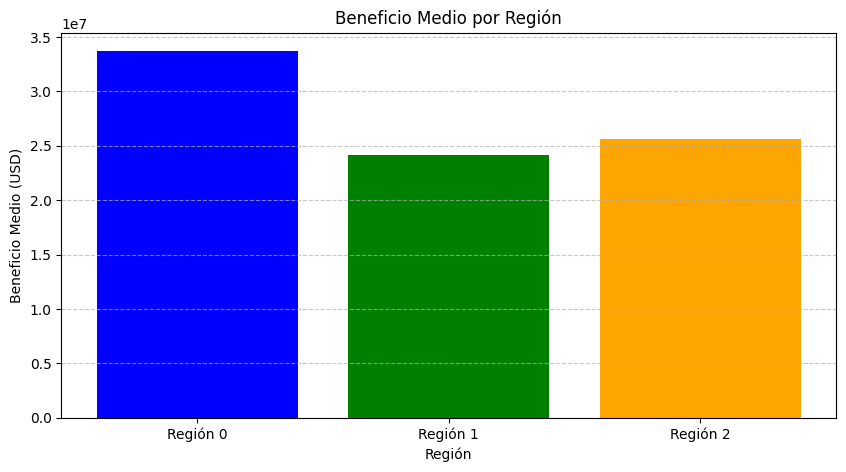

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las regiones
regions = ['Región 0', 'Región 1', 'Región 2']
mean_profits = [mean_profit_0, mean_profit_1, mean_profit_2]
confidence_intervals = [ci_0, ci_1, ci_2]
risks_of_loss = [risk_0, risk_1, risk_2]

# Gráfico de Barras para el Beneficio Medio
plt.figure(figsize=(10, 5))
plt.bar(regions, mean_profits, color=['blue', 'green', 'orange'])
plt.title('Beneficio Medio por Región')
plt.xlabel('Región')
plt.ylabel('Beneficio Medio (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Los resultados se muestran de forma clara.

</div>

Recomendación Final

Seleccionar la Región 0:

Es la región con el mayor beneficio medio ($33.71 millones).
El intervalo de confianza garantiza que el beneficio estará en un rango alto (30.31 a 37.21 millones).

Justificación:
La Región 0 cumple con todos los criterios: maximiza el beneficio, minimiza el riesgo y ofrece un rango de beneficios confiable.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy bien! Has sugerido correctamente una región para el desarrollo, lo que es clave para la planificación estratégica. 

</div>